In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import typing as tp
import random


In [7]:
def calculate_pareto_frontier(data):
    pareto_frontier = [data[0]]  # Initialize the Pareto frontier with the first data point

    for point in data[1:]:
        # Check if the current point dominates any point on the Pareto frontier
        is_dominated = False
        frontier_copy = pareto_frontier.copy()  # Create a copy to avoid modifying the frontier during iteration

        for frontier_point in frontier_copy:
            if point['f1'] <= frontier_point['f1'] and point['connectedness'] <= frontier_point['connectedness']:
                # If the current point is worse or equal in both metrics, it is dominated
                is_dominated = True
                break

            if point['f1'] >= frontier_point['f1'] and point['connectedness'] >= frontier_point['connectedness']:
                # If the current point is better or equal in both metrics, it dominates the frontier point
                pareto_frontier.remove(frontier_point)

        if not is_dominated:
            pareto_frontier.append(point)  # Add the current point to the Pareto frontier

    return pareto_frontier

In [8]:
random.seed(43)
data = [{'f1': random.random(), 'connectedness': random.random(), 'epoch': i} for i in range(20)]


In [20]:
def plot_pareto_frontier(d: tp.List[dict], pf: tp.List[dict], epochs=False):
    """Plot pareto frontier and consecutive epochs line.

    Args:
        d (tp.List[dict]): All data points to plot.
        pf (tp.List[dict]): Pareto frontier data points to plot.
    """
    # Extract metric values from Pareto frontier
    pf_copy = pf.copy()
    pf_copy.sort(key=lambda x: x['f1'])
    pareto_A = [point['f1'] for point in pf_copy]
    pareto_B = [point['connectedness'] for point in pf_copy]

    d.sort(key=lambda x: x['epoch'])

    # Create a continuous pastel gradient color map
    cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', ['#FFD700', '#FF7F50'])

    # Extract data points
    x = [point['f1'] for point in d]
    y = [point['connectedness'] for point in d]
    c = [point['epoch'] for point in d]

    # Create plot
    fig = plt.figure(figsize=(8, 6))

    # Plotting the Pareto frontier
    ax1 = plt.scatter(x, y, c=c, marker='x', cmap=cmap)
    fig.colorbar(ax1, label='Epoch')

    for i in range(len(d)):
        plt.text(x=d[i]['f1']+0.01,y=d[i]['connectedness']+0.01,s=d[i]['epoch'], 
                fontdict=dict(color='black',size=7))
    plt.plot(pareto_A, pareto_B, color='#F49AC2', label='Pareto Frontier')
    # plot consecutive epochs line
    if epochs:
        plt.plot(x, y, label='Consecutive Epochs', color='black', linestyle='--', linewidth=2)
    
    plt.axhline(y=1, color='#AEC6CF', linestyle='--', linewidth=2, label='Max Connectedness')
    plt.axvline(x=1, color='#B7D1A1', linestyle='--', linewidth=2, label='Max F1')
    plt.xlabel('Metric F1')
    plt.ylabel('Metric Connectedness')
    # set limits <0,1.5> for both axes
    
    plt.xlim(0, max(metric['f1'] for metric in d) + .25)
    plt.ylim(0, max(metric['connectedness'] for metric in d) + .25)
    plt.title('Example Pareto front in consecutive epochs')
    plt.legend()
    plt.show()

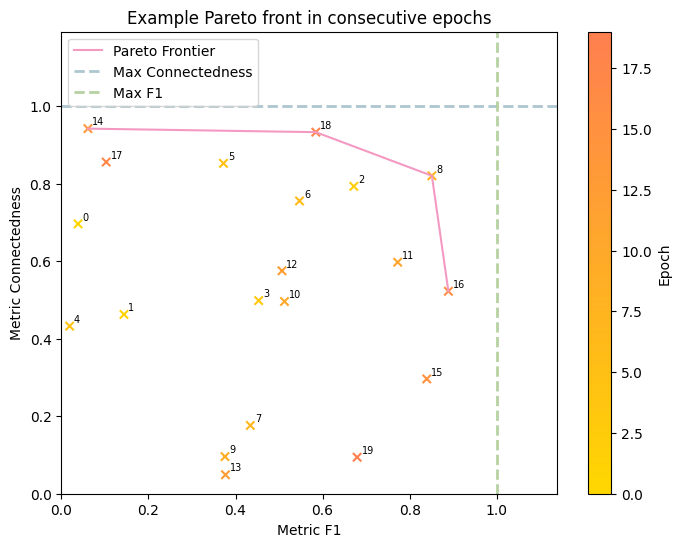

In [21]:
pareto_frontier = data
pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

In [ ]:
p = {'f1': .5, 'connectedness': 1, 'epoch': 20}
data = [p, *data]
pareto_frontier = [p, *pareto_frontier]

pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

if p in pareto_frontier:
    print('yes')
else:
    print('no')

In [ ]:
p = {'f1': .3, 'connectedness': .24, 'epoch': 21}
data = [p, *data]
pareto_frontier = [p, *pareto_frontier]

pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

if p in pareto_frontier:
    print('yes')
else:
    print('no')

In [45]:
import networkx as nx
import dgl
import matplotlib.pyplot as plt

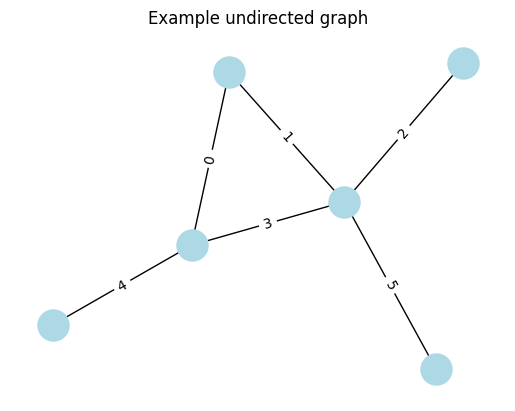

In [52]:
# Create an empty graph
G = nx.DiGraph()

# Add edges to the graph with attributes
edges = [(1, 3, {'number': 0}), (1, 4, {'number': 1}), (2, 4, {'number': 2}), (3, 4, {'number': 3}),
         (3, 6, {'number': 4}), (4, 5, {'number': 5})]

G.add_edges_from(edges)

def draw_graph(g):
    # Create a layout for the graph
    pos = nx.kamada_kawai_layout(g)

    # Draw edges with labels
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=nx.get_edge_attributes(g, 'number'))

    # Remove node labels
    node_labels = {n: '' for n in g.nodes()}

    # Draw nodes without labels
    nx.draw_networkx_nodes(g, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(g, pos, labels=node_labels)

    # Show the graph
    plt.axis('off')

    # Add title
    plt.title('Example undirected graph')

    plt.show()

draw_graph(G.to_undirected())

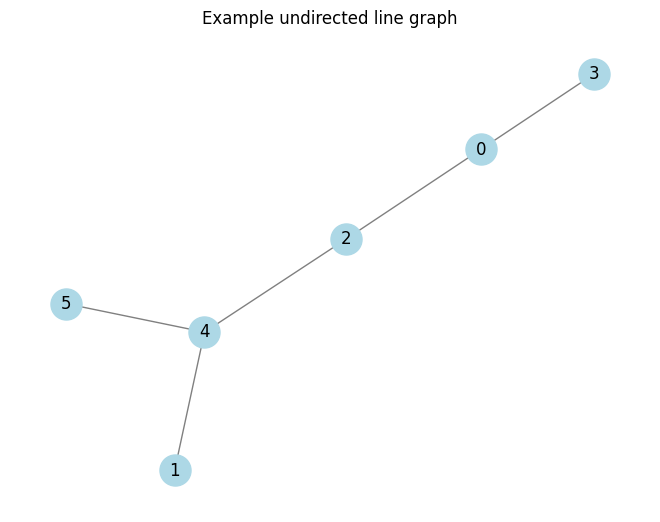

In [53]:
def draw_linegraph(g):
    # Create a layout for the graph
    pos = nx.spring_layout(g)
    
    # Draw the graph
    nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')

    # Add title
    plt.title('Example undirected line graph')

    # Show the graph
    plt.show()


dgl_g = dgl.from_networkx(G) 
line_graph = dgl.line_graph(dgl_g)
nx_lg = line_graph.to_networkx()

draw_linegraph(nx_lg.to_undirected())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def extract_colormap_colors(cmap_name, num_colors):
    cmap = plt.cm.get_cmap(cmap_name, num_colors)
    print(cmap)
    colors = [mcolors.to_hex(cmap(i)) for i in range(num_colors)]
    return colors

# Example usage
cmap_name = 'Blues'
num_colors = 100
colormap_colors = extract_colormap_colors(cmap_name, num_colors)

# Print the extracted colors
for color in colormap_colors:
    print(color)


In [30]:
# Create a continuous pastel gradient color map
cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', ['#FFD700', '#FF7F50'])

# Generate a gradient of colors
num_colors = 12  # Number of colors in the gradient
colors = [mcolors.to_hex(cmap(i / (num_colors - 1))) for i in range(num_colors)]

# Print the generated colors
for color in colors:
    print(color)

#ffd700
#ffcf07
#ffc70e
#ffbf16
#ffb71d
#ffaf24
#ffa72c
#ff9f33
#ff973a
#ff8f42
#ff8749
#ff7f50
